# EXPLORATORY ANALYSIS OF GEOLOCATIONAL DATA

In [1]:
import numpy as np
import pandas as pd
##For plotting purpose
import matplotlib.pyplot as plt
import seaborn as sns
##For geospatial
import folium
import geopy
##for deep learning
import minisom

In [2]:
Data =pd.read_csv("food_coded.csv")

In [3]:
Data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,3.0,2,1.0,"My diet consists mainly of coffee, water, frui...",2,2.0,I have noticed there is less time for a prepar...,1,3,2,1.0,4,2.0,4.0,Accountant,Italian,1,1.0,Stromboli Mac and Cheese and Pizza,1,5,4,5,5,mainly protein and vegetables with a complex c...,My ideal diet would consist of a majority of w...,6,4.0,3,5,7.0,1.0,"pasta, fish, steak",3.0,Radiological Technician,5,3.0,1,4,3.0

# Data Cleaning

In [6]:
Data.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [7]:
Column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']

In [8]:
d=Data[Column]
d

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


# Data Visualisation and Exploration

In [9]:
sns.pairplot(d)

In [10]:
ax=d.boxplot(figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[]

In [15]:
d.shape

(125, 11)

In [16]:
s = d.dropna()

In [17]:
from sklearn import preprocessing, cluster
import scipy

In [ ]:
f=['cook','income']
X = s[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = "KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF" # your Foursquare ID
CLIENT_SECRET = "KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR" # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000

In [22]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    17.448372, 78.526957,
    30000, 
    LIMIT)

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6139dd154fe570031e043bb6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hyderabad',
  'headerFullLocation': 'Hyderabad',
  'headerLocationGranularity': 'city',
  'totalResults': 147,
  'suggestedBounds': {'ne': {'lat': 17.71837227000027,
    'lng': 78.80945141641452},
   'sw': {'lat': 17.17837172999973, 'lng': 78.24446258358547}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '513afb90e4b04d69fd7cc3c7',
       'name': 'Okra Restaurant',
       'location': {'address': 'Opposite Hussain Sagar Lake',
        'crossStreet': 'Tank Bund Road',
        'lat': 17.423816625946916,
        'lng': 78.48725662547521,
        'labeledLatLngs': [{'label'

In [24]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues

<ipython-input-24-62056a142241>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-513afb90e4b04d69fd7cc3c7-0,0,"[{'summary': 'This spot is popular', 'type': '...",513afb90e4b04d69fd7cc3c7,Okra Restaurant,Opposite Hussain Sagar Lake,Tank Bund Road,17.423817,78.487257,"[{'label': 'display', 'lat': 17.42381662594691...",...,IN,Hyderabad,Telangana,India,"[Opposite Hussain Sagar Lake (Tank Bund Road),...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN
1,e-0-4df9c65c62e1e9a24367f9e5-1,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,Narayanguda-himayat Nagar X Roads,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",...,IN,Hyderabad,Telangana,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,NaN
2,e-0-4bac7d4df964a5205df73ae3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4bac7d4df964a5205df73ae3,10 Downing Street,"Ground Floor, Lifestyle Building, Greenlands",Begumpet Rd,17.435868,78.457443,"[{'label': 'display', 'lat': 17.43586817493973...",...,IN,Hyderabad,Telangana,India,"[Ground Floor, Lifestyle Building, Greenlands ...","[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[],NaN,NaN
3,e-0-4c543cc0728920a13abe6a82-3,0,"[{'summary': 'This spot is popular', 'type': '...",4c543cc0728920a13abe6a82,Kebabs & Kurries,"Greenlands Flyover, Greenlands, Punjagutta",NaN,17.432374,78.457585,"[{'label': 'display', 'lat': 17.43237414419468...",...,IN,Hyderabad,Telangana,India,"[Greenlands Flyover, Greenlands, Punjagutta, H...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN
4,e-0-4f66024de4b0777dfdc91dde-4,0,"[{'summary': 'This spot is popular', 'type': '...",4f66024de4b0777dfdc91dde,Cream Stone Concepts,Himayathnagar,NaN,17.404284,78.481458,"[{'label': 'display', 'lat': 17.40428360291939...",...,IN,Hyderabad,Telangana,India,"[Himayathnagar, Hyderabad 500029, Telangana, I...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-5544c61b498eb2d80a71d50e-95,0,"[{'summary': 'This spot is popular', 'type': '...",5544c61b498eb2d80a71d50e,Jewel of Nizam- The Minar,The Golkonda Resorts & Spa,"SagarMahal Complex, Gandipet",17.388674,78.316222,"[{'label': 'display', 'lat': 17.38867381259880...",...,IN,Hyderabad,Telangana,India,[The Golkonda Resorts & Spa (SagarMahal Comple...,"[{'id': '54135bf5e4b08f3d2429dfe6', 'name': 'H...",0,[],NaN,NaN
96,e-0-51f76fb9498ed61c0a16f1b9-96,0,"[{'summary': 'This spot is popular', 'type': '...",51f76fb9498ed61c0a16f1b9,Decathlon Sports Store,NaN,NaN,17.242370,78.434798,"[{'label': 'display', 'lat': 17.24236966601028...",...,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d1f2941735', 'name': 'S...",0,[],NaN,NaN
97,e-0-5c0413f7724750002cd8f006-97,0,"[{'summary': 'This spot is popular', 'type': '...",5c0413f7724750002cd8f006,Amb Cinemas,Kondapur,NaN,17.457379,78.363723,"[{'label': 'display', 'lat': 17.45737932852447...",...,IN,Hyderabad,TG,India,"[Kondapur, Hyderabad 500084, TG, India]","[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",0,[],NaN,Kondapur
98,e-0-4ffc713be4b02c1b1143c918-98,0,"[{'summary': 'This spot is popular', 'type': '...",4ffc713be4b02c1b1143c918,DLF Street Food,Gachibowli,NaN,17.448710,78.355752,"[{'label': 'display', 'lat': 17.44870996824896...",...,IN,Hyderabad,Telangana,India,"[Gachibowli, Hyderabad, Telangana, India]","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],NaN,NaN


In [25]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

<ipython-input-25-a50970c9ac62>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venue = json_normalize(venue)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-513afb90e4b04d69fd7cc3c7-0,0,"[{'summary': 'This spot is popular', 'type': '...",513afb90e4b04d69fd7cc3c7,Okra Restaurant,Opposite Hussain Sagar Lake,Tank Bund Road,17.423817,78.487257,"[{'label': 'display', 'lat': 17.42381662594691...",...,Telangana,India,"[Opposite Hussain Sagar Lake (Tank Bund Road),...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN,5,9
1,e-0-4df9c65c62e1e9a24367f9e5-1,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,Narayanguda-himayat Nagar X Roads,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",...,Telangana,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,NaN,22,9
2,e-0-4bac7d4df964a5205df73ae3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4bac7d4df964a5205df73ae3,10 Downing Street,"Ground Floor, Lifestyle Building, Greenlands",Begumpet Rd,17.435868,78.457443,"[{'label': 'display', 'lat': 17.43586817493973...",...,Telangana,India,"[Ground Floor, Lifestyle Building, Greenlands ...","[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[],NaN,NaN,27,20
3,e-0-4c543cc0728920a13abe6a82-3,0,"[{'summary': 'This spot is popular', 'type': '...",4c543cc0728920a13abe6a82,Kebabs & Kurries,"Greenlands Flyover, Greenlands, Punjagutta",NaN,17.432374,78.457585,"[{'label': 'display', 'lat': 17.43237414419468...",...,Telangana,India,"[Greenlands Flyover, Greenlands, Punjagutta, H...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,37,28
4,e-0-4f66024de4b0777dfdc91dde-4,0,"[{'summary': 'This spot is popular', 'type': '...",4f66024de4b0777dfdc91dde,Cream Stone Concepts,Himayathnagar,NaN,17.404284,78.481458,"[{'label': 'display', 'lat': 17.40428360291939...",...,Telangana,India,"[Himayathnagar, Hyderabad 500029, Telangana, I...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN,29,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-5544c61b498eb2d80a71d50e-95,0,"[{'summary': 'This spot is popular', 'type': '...",5544c61b498eb2d80a71d50e,Jewel of Nizam- The Minar,The Golkonda Resorts & Spa,"SagarMahal Complex, Gandipet",17.388674,78.316222,"[{'label': 'display', 'lat': 17.38867381259880...",...,Telangana,India,[The Golkonda Resorts & Spa (SagarMahal Comple...,"[{'id': '54135bf5e4b08f3d2429dfe6', 'name': 'H...",0,[],NaN,NaN,2,2
96,e-0-51f76fb9498ed61c0a16f1b9-96,0,"[{'summary': 'This spot is popular', 'type': '...",51f76fb9498ed61c0a16f1b9,Decathlon Sports Store,NaN,NaN,17.242370,78.434798,"[{'label': 'display', 'lat': 17.24236966601028...",...,NaN,India,[India],"[{'id': '4bf58dd8d48988d1f2941735', 'name': 'S...",0,[],NaN,NaN,16,17
97,e-0-5c0413f7724750002cd8f006-97,0,"[{'summary': 'This spot is popular', 'type': '...",5c0413f7724750002cd8f006,Amb Cinemas,Kondapur,NaN,17.457379,78.363723,"[{'label': 'display', 'lat': 17.45737932852447...",...,TG,India,"[Kondapur, Hyderabad 500084, TG, India]","[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",0,[],NaN,Kondapur,29,12
98,e-0-4ffc713be4b02c1b1143c918-98,0,"[{'summary': 'This spot is popular', 'type': '...",4ffc713be4b02c1b1143c918,DLF Street Food,Gachibowli,NaN,17.448710,78.355752,"[{'label': 'display', 'lat': 17.44870996824896...",...,Telangana,India,"[Gachibowli, Hyderabad, Telangana, India]","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],NaN,NaN,42,9


In [26]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

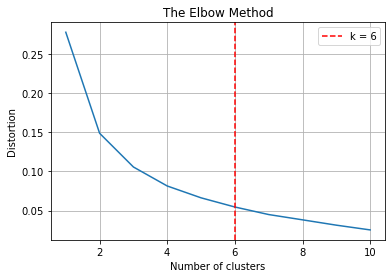

In [29]:
f=['venue.location.lat','venue.location.lng']
X = nearby_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [30]:
city = "Hyderabad"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Hyderabad, Bahadurpura mandal, Hyderabad, Telangana, India
[lat, long]: [17.360589, 78.4740613]


In [31]:
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-513afb90e4b04d69fd7cc3c7-0,0,"[{'summary': 'This spot is popular', 'type': '...",513afb90e4b04d69fd7cc3c7,Okra Restaurant,Opposite Hussain Sagar Lake,Tank Bund Road,17.423817,78.487257,"[{'label': 'display', 'lat': 17.42381662594691...",...,Telangana,India,"[Opposite Hussain Sagar Lake (Tank Bund Road),...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN,5,9
1,e-0-4df9c65c62e1e9a24367f9e5-1,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,Narayanguda-himayat Nagar X Roads,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",...,Telangana,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,NaN,22,9
2,e-0-4bac7d4df964a5205df73ae3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4bac7d4df964a5205df73ae3,10 Downing Street,"Ground Floor, Lifestyle Building, Greenlands",Begumpet Rd,17.435868,78.457443,"[{'label': 'display', 'lat': 17.43586817493973...",...,Telangana,India,"[Ground Floor, Lifestyle Building, Greenlands ...","[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[],NaN,NaN,27,20
3,e-0-4c543cc0728920a13abe6a82-3,0,"[{'summary': 'This spot is popular', 'type': '...",4c543cc0728920a13abe6a82,Kebabs & Kurries,"Greenlands Flyover, Greenlands, Punjagutta",NaN,17.432374,78.457585,"[{'label': 'display', 'lat': 17.43237414419468...",...,Telangana,India,"[Greenlands Flyover, Greenlands, Punjagutta, H...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,37,28
4,e-0-4f66024de4b0777dfdc91dde-4,0,"[{'summary': 'This spot is popular', 'type': '...",4f66024de4b0777dfdc91dde,Cream Stone Concepts,Himayathnagar,NaN,17.404284,78.481458,"[{'label': 'display', 'lat': 17.40428360291939...",...,Telangana,India,"[Himayathnagar, Hyderabad 500029, Telangana, I...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN,29,9


In [32]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups', 'venue.venuePage.id',
       'venue.location.neighborhood', 'restaurant', 'others'],
      dtype='object')

In [33]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.neighborhood',	'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [34]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

In [39]:
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,17.423817,78.487257,"[Opposite Hussain Sagar Lake (Tank Bund Road),...",5,9
1,17.400678,78.488575,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,22,9
2,17.435868,78.457443,"[Ground Floor, Lifestyle Building, Greenlands ...",27,20
3,17.432374,78.457585,"[Greenlands Flyover, Greenlands, Punjagutta, H...",37,28
4,17.404284,78.481458,"[Himayathnagar, Hyderabad 500029, Telangana, I...",29,9
...,...,...,...,...,...
95,17.388674,78.316222,[The Golkonda Resorts & Spa (SagarMahal Comple...,2,2
96,17.242370,78.434798,[India],16,17
97,17.457379,78.363723,"[Kondapur, Hyderabad 500084, TG, India]",29,12
98,17.448710,78.355752,"[Gachibowli, Hyderabad, Telangana, India]",42,9


In [40]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,17.423817,78.487257,"[Opposite Hussain Sagar Lake (Tank Bund Road),...",5,9
1,17.400678,78.488575,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,22,9
2,17.435868,78.457443,"[Ground Floor, Lifestyle Building, Greenlands ...",27,20
3,17.432374,78.457585,"[Greenlands Flyover, Greenlands, Punjagutta, H...",37,28
4,17.404284,78.481458,"[Himayathnagar, Hyderabad 500029, Telangana, I...",29,9
...,...,...,...,...,...
95,17.388674,78.316222,[The Golkonda Resorts & Spa (SagarMahal Comple...,2,2
96,17.242370,78.434798,[India],16,17
97,17.457379,78.363723,"[Kondapur, Hyderabad 500084, TG, India]",29,12
98,17.448710,78.355752,"[Gachibowli, Hyderabad, Telangana, India]",42,9


In [37]:
n['venue.location.formattedAddress']

0     [Opposite Hussain Sagar Lake (Tank Bund Road),...
1     [Himayatnagar (Narayanguda-himayat Nagar X Roa...
2     [Ground Floor, Lifestyle Building, Greenlands ...
3     [Greenlands Flyover, Greenlands, Punjagutta, H...
4     [Himayathnagar, Hyderabad 500029, Telangana, I...
                            ...                        
95    [The Golkonda Resorts & Spa (SagarMahal Comple...
96                                              [India]
97              [Kondapur, Hyderabad 500084, TG, India]
98            [Gachibowli, Hyderabad, Telangana, India]
99    [Gachibowli, Miyapur Road, Hyderabad 500032, T...
Name: venue.location.formattedAddress, Length: 100, dtype: object

In [41]:
spec_chars = ["[","]"]
for char in spec_chars:
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')


In [42]:
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,17.423817,78.487257,'Opposite Hussain Sagar Lake (Tank Bund Road)...,5,9
1,17.400678,78.488575,'Himayatnagar (Narayanguda-himayat Nagar X Ro...,22,9
2,17.435868,78.457443,"'Ground Floor, Lifestyle Building, Greenlands...",27,20
3,17.432374,78.457585,"'Greenlands Flyover, Greenlands, Punjagutta',...",37,28
4,17.404284,78.481458,"'Himayathnagar', 'Hyderabad 500029', 'Telanga...",29,9
...,...,...,...,...,...
95,17.388674,78.316222,'The Golkonda Resorts & Spa (SagarMahal Compl...,2,2
96,17.242370,78.434798,'India',16,17
97,17.457379,78.363723,"'Kondapur', 'Hyderabad 500084', 'TG', 'India'",29,12
98,17.448710,78.355752,"'Gachibowli', 'Hyderabad', 'Telangana', 'India'",42,9


In [43]:
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = n.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_

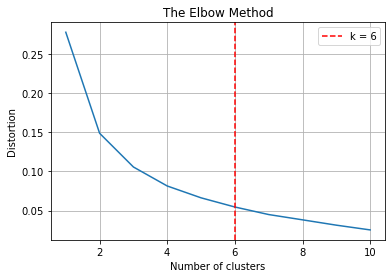

In [44]:
X = n[["lat","long"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()


In [45]:
k = 6
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

D:\Users\Tuhina Shaw\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,17.423817,78.487257,'Opposite Hussain Sagar Lake (Tank Bund Road)...,5,9,5,0
1,17.400678,78.488575,'Himayatnagar (Narayanguda-himayat Nagar X Ro...,22,9,2,0
2,17.435868,78.457443,"'Ground Floor, Lifestyle Building, Greenlands...",27,20,1,0
3,17.432374,78.457585,"'Greenlands Flyover, Greenlands, Punjagutta',...",37,28,1,0
4,17.404284,78.481458,"'Himayathnagar', 'Hyderabad 500029', 'Telanga...",29,9,2,0
...,...,...,...,...,...,...,...
95,17.388674,78.316222,'The Golkonda Resorts & Spa (SagarMahal Compl...,2,2,0,0
96,17.242370,78.434798,'India',16,17,3,1
97,17.457379,78.363723,"'Kondapur', 'Hyderabad 500084', 'TG', 'India'",29,12,0,0
98,17.448710,78.355752,"'Gachibowli', 'Hyderabad', 'Telangana', 'India'",42,9,0,0


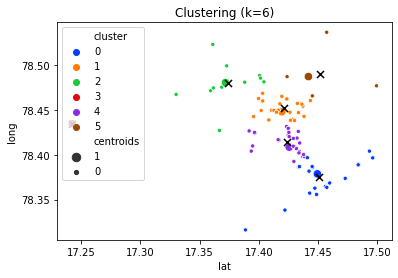

In [46]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [47]:
model = cluster.AffinityPropagation()


Text(0.5, 1.0, 'Clustering (k=6)')

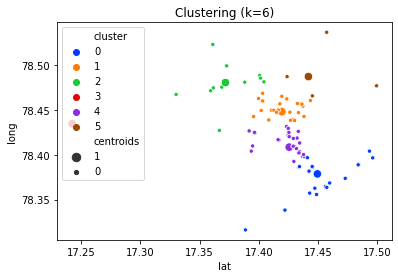

In [48]:
k = n["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [49]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_